# **Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.**
### Módulo 2: Machine Learning
*Adrián Emmanuel Faz Mercado A01570770*

**Dataset**: iris.csv

**Liga al dataset**: https://www.kaggle.com/datasets/uciml/iris

**Descripción del dataset**: El dataset de "iris.csv" contiene información y registros de diferentes características de tres especies de Iris recogidas por el botánico Edgar Anderson. Existen 150 registros, y cada registro tiene las siguientes características:
* Petal_Length
* Petal_Width
* Sepal_Length
* Sepal_Width

**Problema a resolver**: El problema presentado se trata de **clasificación**, pues lo que se busca es crear un modelo que permita clasificar una muestra en base a sus características como longitud de los pétalos, anchura de los pétalos, entre otros. Se trata de clasificación porque se busca que el modelo sea capaz de clasificar a cuál de las 3 posibles clases pertenece una muestra de iris.


Importamos las librerías que se necesitarán

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Cargamos los datos y asignamos nuestras variables de X y Y.

In [ ]:
data = pd.read_csv("iris.csv")
# Se elimina el Id, para que no afecte en el modelo.
data = data.drop(['Id'], axis = 1)

# Le asignamos "Species" a Y porque es nuestra variable de salida, la que queremos predecir.
Y = data["Species"]

# Asignamos las demás columnas como la variable X, pues nos ayudarán con el entrenamiento.
X = data.drop(['Species'], axis = 1)

# Dividimos los datos en datos de entrenamiento y datos de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

Creación de nuestro objeto del modelo, en este caso vamos a modificar el parámetro **criterion** para que se base en la entropía para realizar la división y la creación del modelo.

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 0.997\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.433\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.169\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[1] <= 2.65\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846

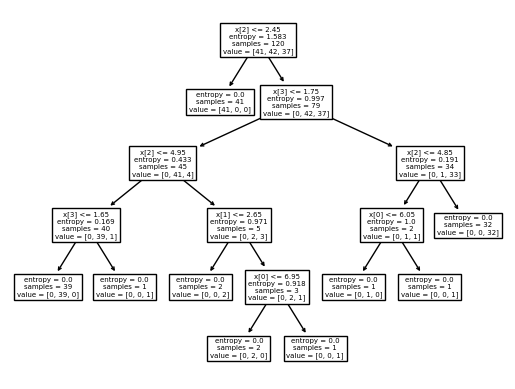

In [ ]:
# Creamos nuestro objeto de Árbol de Decisión.
myTree = DecisionTreeClassifier(criterion="entropy")
myTree.fit(X_train,y_train)

# Obtenemos las predicciones de los valores de prueba utilizando el modelo.
y_test_pred = myTree.predict(X_test)
plot_tree(myTree)

Seleccionamos 3 valores de prueba aleatorios para revisar la comparación entre la predicción con los valores reales.

In [ ]:
from sklearn.metrics import classification_report

y_train_pred = myTree.predict(X_train)

accuracy = accuracy_score(y_train_pred, y_train)
print(f"Accuracy Training Data: {accuracy*100}%")

accuracy_test = accuracy_score(y_test_pred, y_test)
print(f"Accuracy Testing Data: {accuracy*100}%")

Accuracy Training Data: 100.0%
Accuracy Testing Data: 100.0%


En este caso, estamos teniendo una accuracy de 100% en ambos casos, tanto para los datos de entrenamiento como para los datos de prueba.

Vamos a revisar las demás métricas también creando un reporte de los datos de entrenamiento y de los datos de prueba.  


Reporte de métricas datos de entrenamiento

In [ ]:
# Reporte de los datos de entrenamiento
print(classification_report(y_train, y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        41
Iris-versicolor       1.00      1.00      1.00        42
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



Reporte de las métricas de los datos de testeo

In [ ]:
print(classification_report(y_test, y_test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



Se puede observar que los datos de entrenamiento tienen resultados practicamente perfectos en cuestión de las métricas, mientras que los datos de testeo tampoco se quedaron atrás, pues si bien no son completamente perfectos, tienen valores muy cercanos a 1, lo que nos indica que el modelo va por muy buen camino y está clasificando correctamente.

También, para analizar el desempeño del modelo por medio de una tabla, seleccionamos 3 registros aleatorios de nuestro set de testeo para comparalos con los valores reales de y.

In [ ]:
import random
# Seleccionamos 3 valores aleatorios del set de testing.
random_indices = random.sample(range(len(X_test)), 3)

# Usamos estos índices para seleccionar los valores respectivos de X y Y, y además
random_x_test = X_test.iloc[random_indices]
random_predict = myTree.predict(random_x_test)
random_y_test = y_test.iloc[random_indices]

# Creamos una tabla para comparar nuestros valores de prueba.
comparison_table = pd.DataFrame({
    'Predicted_y': random_predict.tolist(),
    'Real_y': random_y_test.reset_index(drop=True).values.tolist()
})

print("Comparison Table:")
print(comparison_table)

Comparison Table:
      Predicted_y          Real_y
0  Iris-virginica  Iris-virginica
1     Iris-setosa     Iris-setosa
2     Iris-setosa     Iris-setosa


En la prueba realizada, los 3 registros aleatorios que se seleccionaron fueron clasificados correctamente. Sin embargo, esto podría variar pues cada vez que se corre el bloque de código, se van a seleccionar diferentes pruebas del set total de pruebas.

Ahora, vamos a probar modificar otros parámetros para analizar de qué manera cambia el desempeño del Árbol de Decisión.

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 120\nvalue = [41, 42, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 0.997\nsamples = 79\nvalue = [0, 42, 37]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.433\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.125, 0.125, 'entropy = 0.169\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

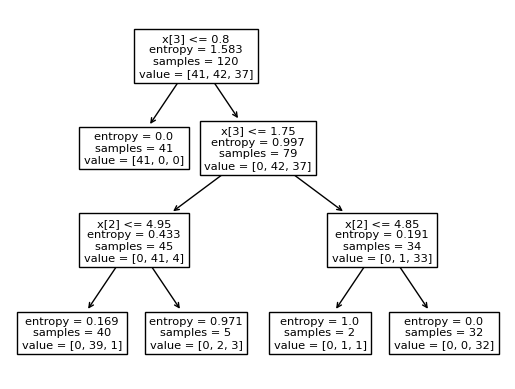

In [ ]:
# Creamos nuestro objeto de Árbol de Decisión.
newTree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
newTree.fit(X_train,y_train)

# Obtenemos las predicciones de los valores de prueba utilizando el modelo.
y_test_pred = myTree.predict(X_test)
plot_tree(newTree)